In [1]:
from neuromaps import datasets, images
from neuromaps.datasets import fetch_fsaverage
from surfplot import Plot
import numpy as np
from os.path import join

/home/s-kawashima/miniconda3/envs/zaida_tutorial/lib/python3.12/site-packages/neuromaps/datasets/utils.py:6: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import resource_filename


In [2]:
# Set up directories for ROI analysis
base_dir = '/disk1/MRI-Data_in-use/20_narrativefMRI/10_ds002245-v.1.0.3_Hasson/'
afni_dir = join(base_dir, 'derivatives', 'afni-nosmooth')
tpl_dir = join(afni_dir, 'tpl-fsaverage6')

In [3]:
tpl_dir

'/disk1/MRI-Data_in-use/20_narrativefMRI/10_ds002245-v.1.0.3_Hasson/derivatives/afni-nosmooth/tpl-fsaverage6'

In [4]:
surfaces = fetch_fsaverage(density='41k')
lh, rh = surfaces['inflated']

In [5]:
eac_lh = images.load_gifti(tpl_dir + "/tpl-fsaverage6_hemi-L_desc-EAC_mask.label.gii")
eac_rh = images.load_gifti(tpl_dir + "/tpl-fsaverage6_hemi-R_desc-EAC_mask.label.gii")

In [6]:
eac_lh_data = eac_lh.agg_data()
eac_rh_data = eac_rh.agg_data()
eac_data = np.concatenate((eac_lh_data, eac_rh_data))

In [7]:
eac_data.shape

(81924,)

/tmp/ipykernel_598933/3857096612.py:8: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


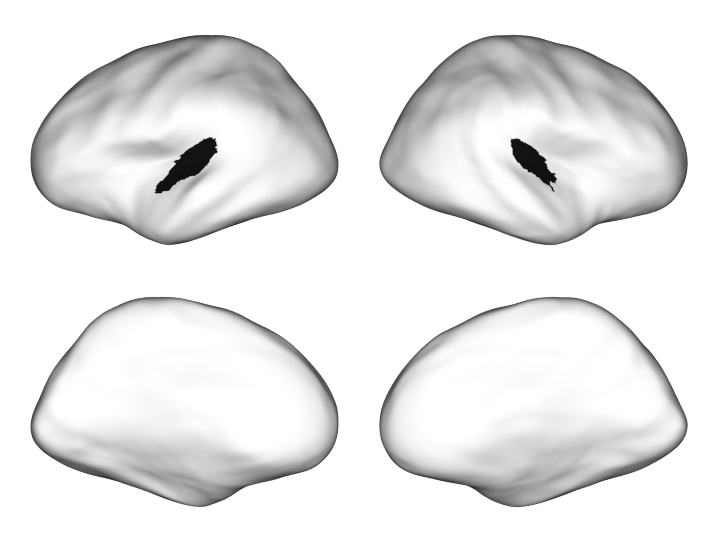

In [10]:
p = Plot(lh, rh, size=(800, 600), zoom=1.5, 
         # label_text={'left':['EAC roi']}, 
         brightness=.8)
p.add_layer(eac_data.reshape([81924]), cmap='binary_r', cbar=False)
fig = p.build()
fig.savefig(f'./surface_plot/eac_roi.png', 
            dpi=300, bbox_inches='tight')
fig.show()